**This notebook is for demonstration purposes only. The focus is on illustrating the ideas rather than code implementation details.** For pseudocode and well-organized implementations, please refer to the textbook and the AIMA Python repository:
https://github.com/aimacode/aima-python/tree/master

In [6]:
pip install networkx matplotlib pygraphviz

Note: you may need to restart the kernel to use updated packages.


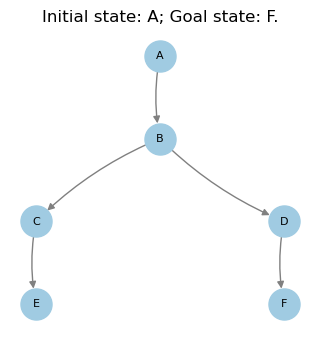

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

# 1. Create a graph object
G = nx.DiGraph()

# 2. Add nodes and edges
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'F')])

# 3. Draw the graph
# 3. Use graphviz_layout for a proper hierarchical tree structure
# The 'dot' program specifically generates hierarchical layouts.
try:
    pos = graphviz_layout(G, prog='dot')
except nx.NetworkXException:
    print("Graphviz not found. Please ensure it's installed correctly.")
    print("Falling back to a generic spring layout.")
    pos = nx.spring_layout(G)

# 4. Draw the graph
plt.figure(figsize=(3, 3))
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_color='#a0cbe2',
    node_size=500,
    edge_color='gray',
    font_size=8,
    connectionstyle='arc3, rad=0.1' # Optional: slight curve for parallel edges
)
plt.title("Initial state: A; Goal state: F.")
plt.axis('off') # Turn off axis
plt.show()

In [8]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

try:
    from networkx.drawing.nx_agraph import graphviz_layout
    HAS_GRAPHVIZ = True
except Exception:
    HAS_GRAPHVIZ = False

In [9]:

def draw_state(G, pos, current, frontier, explored, step, popped=None, expanded=None):
    """Draw graph with BFS state: current/frontier/explored."""
    plt.clf()

    # Base: all nodes
    all_nodes = list(G.nodes())
    nx.draw_networkx_nodes(G, pos, nodelist=all_nodes, node_color="lightgray", node_size=650)

    # Explored
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=list(explored), node_color="#b0b0b0", node_size=650)

    # Frontier
    if frontier:
        nx.draw_networkx_nodes(G, pos, nodelist=list(frontier), node_color="#4da6ff", node_size=650)

    # Current exploring node
    if current is not None:
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=[current],
            node_color="#ff4d4d",
            node_size=800,
            edgecolors="black",
            linewidths=1.8
        )

    # Edges + labels
    nx.draw_networkx_edges(G, pos, arrows=True, edge_color="gray", arrowsize=16)
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Title with step info (matches your print style)
    title_lines = ['Initial state: A, goal state: F', f"Time={step}"]
    if popped is not None:
        title_lines.append(f"Pop node: {popped}")
    if expanded is not None:
        title_lines.append(f"Expand {popped} -> {expanded}")
    plt.title("\n".join(title_lines), fontsize=10)

    plt.axis("off")
    plt.tight_layout()
    plt.pause(0.001)  # refresh


Time=0
Frontier: ['A']
Explored: set()


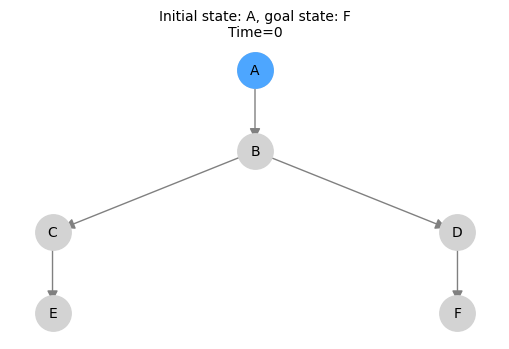

Time=1
Pop node: A
Expand A -> ['B']
Frontier: ['B']
Explored: {'A'}


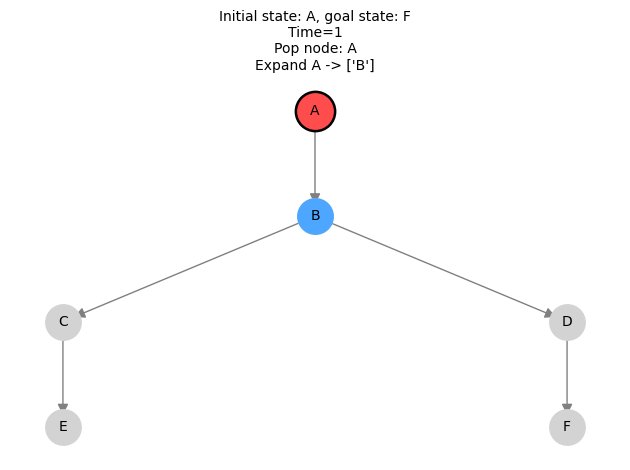

Time=2
Pop node: B
Expand B -> ['C', 'D']
Frontier: ['C', 'D']
Explored: {'A', 'B'}


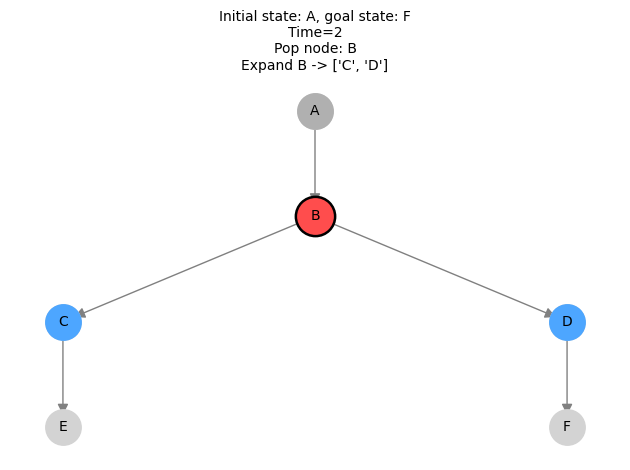

Time=3
Pop node: C
Expand C -> ['E']
Frontier: ['D', 'E']
Explored: {'A', 'B', 'C'}


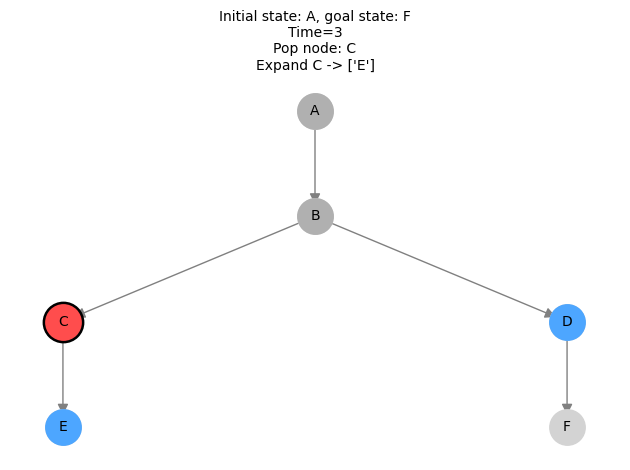

Time=4
Pop node: D
Expand D -> ['F']
Frontier: ['E', 'F']
Explored: {'D', 'A', 'B', 'C'}


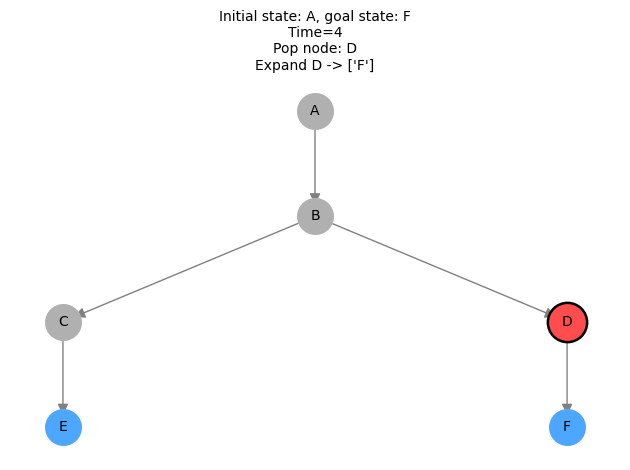

Time=5
Pop node: E
Expand E -> []
Frontier: ['F']
Explored: {'B', 'E', 'C', 'D', 'A'}


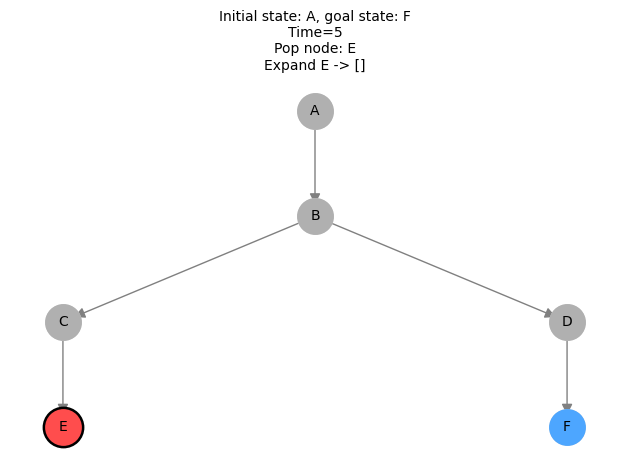

Time=6
Pop node: F


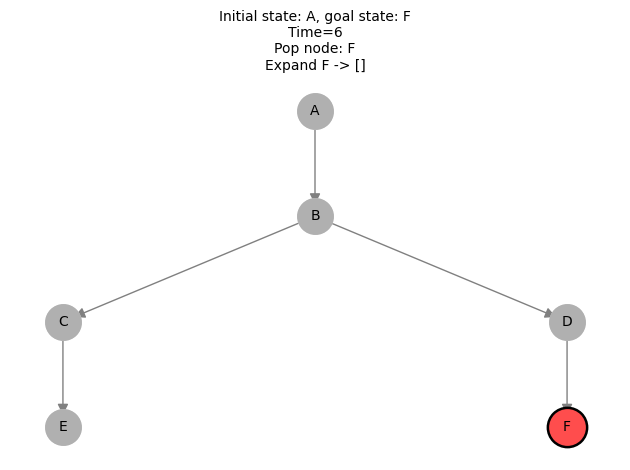

Goal 'F' found!


In [10]:
# -----------------------------
# 1) Build the directed graph
# -----------------------------
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'F')])

start, goal = "A", "F"

# adjacency list for expansion (preserve order)
graph = {n: list(G.successors(n)) for n in G.nodes()}

# layout
if HAS_GRAPHVIZ:
    try:
        pos = graphviz_layout(G, prog="dot")
    except Exception:
        pos = nx.spring_layout(G, seed=0)
else:
    pos = nx.spring_layout(G, seed=0)

# -----------------------------
# 2) BFS init
# -----------------------------
frontier = deque([start])
explored = set()
time_step = 0

plt.figure(figsize=(5.2, 3.6))
print(f"Time={time_step}")
print(f"Frontier: {list(frontier)}")
print(f"Explored: {explored}")

draw_state(
    G, pos,
    current=None,
    frontier=list(frontier),
    explored=explored,
    step=time_step
)
input("Press Enter to start...\n")

# -----------------------------
# 3) BFS loop (step by step)
# -----------------------------
while True:
    # frontier empty
    if not frontier:
        print("Frontier empty. No solution.")
        break

    time_step += 1

    # pop
    node = frontier.popleft()

    print(f"Time={time_step}")
    print(f"Pop node: {node}")

    # goal test (show current node too)
    if node == goal:
        # draw final state: current is goal
        draw_state(
            G, pos,
            current=node,
            frontier=list(frontier),
            explored=explored,
            step=time_step,
            popped=node,
            expanded=[]
        )
        print(f"Goal '{goal}' found!")
        break

    # explored add
    explored.add(node)

    # expand
    children = graph.get(node, [])
    print(f"Expand {node} -> {children}")

    # add to frontier if not in frontier/explored
    frontier_set = set(frontier)  # for O(1) membership
    for child in children:
        if child not in explored and child not in frontier_set:
            frontier.append(child)
            frontier_set.add(child)

    print(f"Frontier: {list(frontier)}")
    print(f"Explored: {explored}")

    # draw current state (current=node)
    draw_state(
        G, pos,
        current=node,
        frontier=list(frontier),
        explored=explored,
        step=time_step,
        popped=node,
        expanded=children
    )

    input("Press Enter for next step...\n")

plt.show()
